In [3]:
# Wczytaj dane
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [20]:
#Weryfikacja dat w pliku
df[['DateofTermination', 'DOB', 'DateofHire']].dtypes

DateofTermination            object
DOB                  datetime64[ns]
DateofHire                   object
dtype: object

In [21]:
#Weryfikacja formatu daty
df[['DateofTermination', 'DOB', 'DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaN,1987-11-24,10/27/2008
1,NaN,1984-04-26,1/6/2014
2,NaN,1986-09-01,9/29/2014
3,04/15/15,1985-09-16,2/16/2015
4,NaN,1988-05-19,5/1/2015


In [23]:
#Konwertowanie dat na jeden styl, system
df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%y', errors='coerce')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'], format='%m/%d/%y', errors='coerce')
df['DateofHire'] = pd.to_datetime(df['DateofHire'], format='%m/%d/%y', errors='coerce')

df[['DateofTermination', 'DOB', 'DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,NaT
1,NaT,1984-04-26,NaT
2,NaT,1986-09-01,NaT
3,2015-04-15,1985-09-16,NaT
4,NaT,1988-05-19,NaT


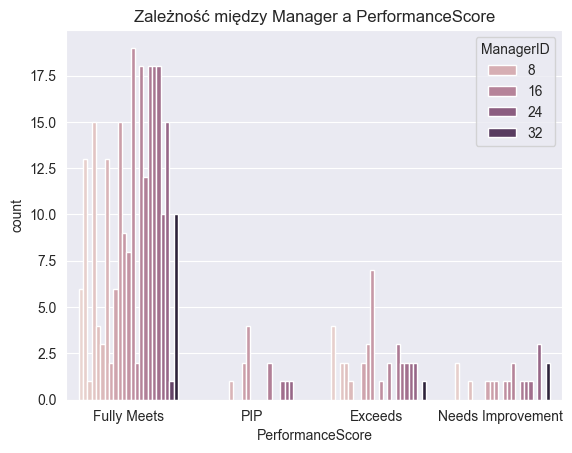

In [55]:
# Pytanie 1: Zależność między Manager a PerformanceScore
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytaj dane
df = pd.read_csv('HRDataset.csv')

# Pytanie 1: Zależność między Manager a PerformanceScore
sns.countplot(x='PerformanceScore', hue='ManagerID', data=df)
#plt.xticks(rotation=45)
plt.title('Zależność między Manager a PerformanceScore')
plt.show()

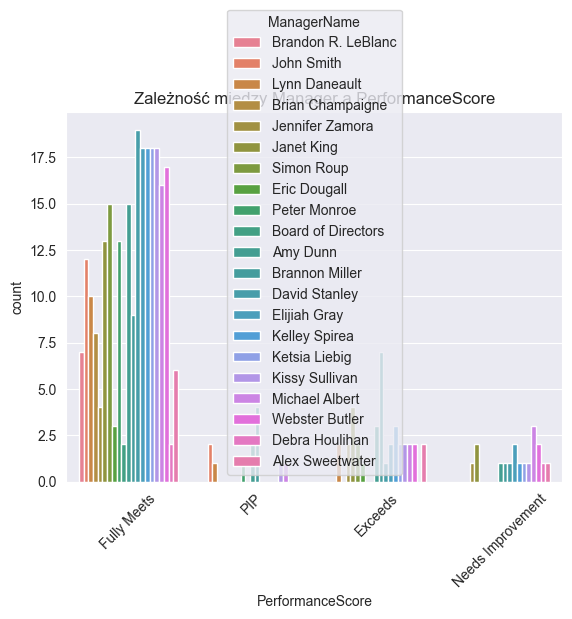

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytaj dane
df = pd.read_csv('HRDataset.csv')

# Pytanie 1: Zależność między Manager a PerformanceScore
sns.countplot(x='PerformanceScore', hue='ManagerName', data=df)
plt.title('Zależność między Manager a PerformanceScore')
plt.xticks(rotation=45)  # Opcjonalne, jeśli chcesz obrócić etykiety na osi x
plt.show()

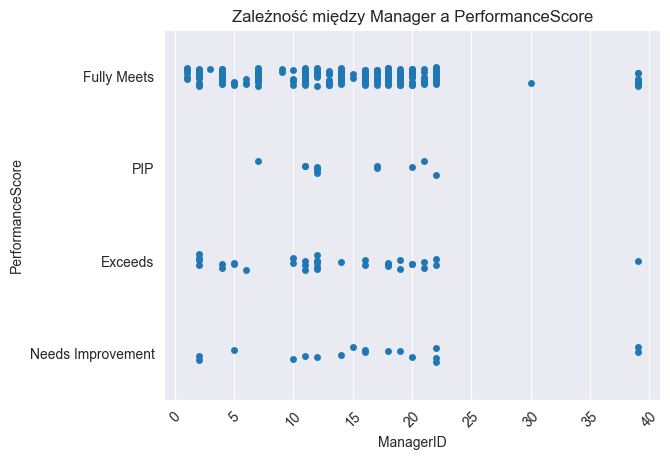

In [56]:
sns.stripplot(x='ManagerID', y='PerformanceScore', data=df, jitter=True)
plt.title('Zależność między Manager a PerformanceScore')
plt.xticks(rotation=45)
plt.show()

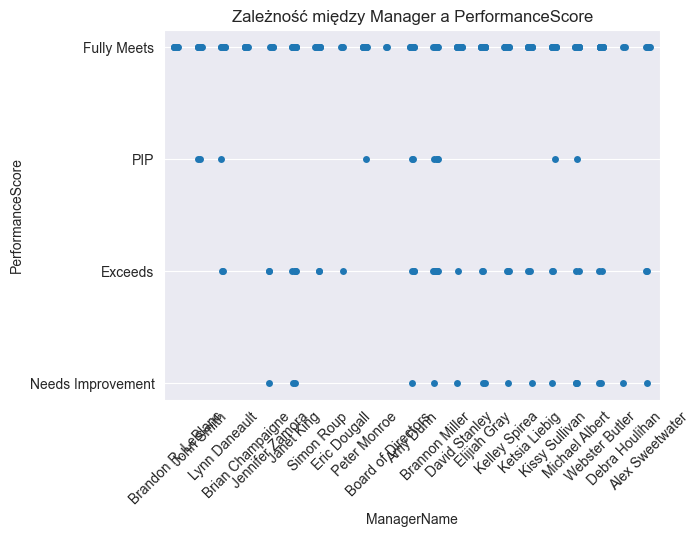

In [59]:
sns.stripplot(x='ManagerName', y='PerformanceScore', data=df, jitter=True)
plt.title('Zależność między Manager a PerformanceScore')
plt.xticks(rotation=45)  # Opcjonalne, jeśli chcesz obrócić etykiety na osi x
plt.show()

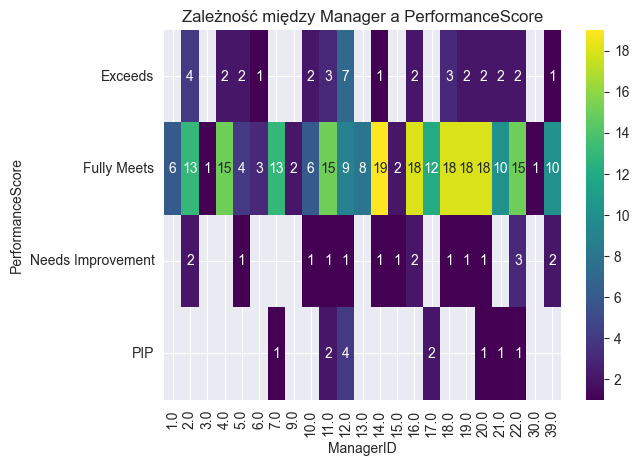

In [57]:
manager_performance = df.pivot_table(index='PerformanceScore', columns='ManagerID', aggfunc='size')
sns.heatmap(manager_performance, annot=True, cmap='viridis')
plt.title('Zależność między Manager a PerformanceScore')
plt.show()

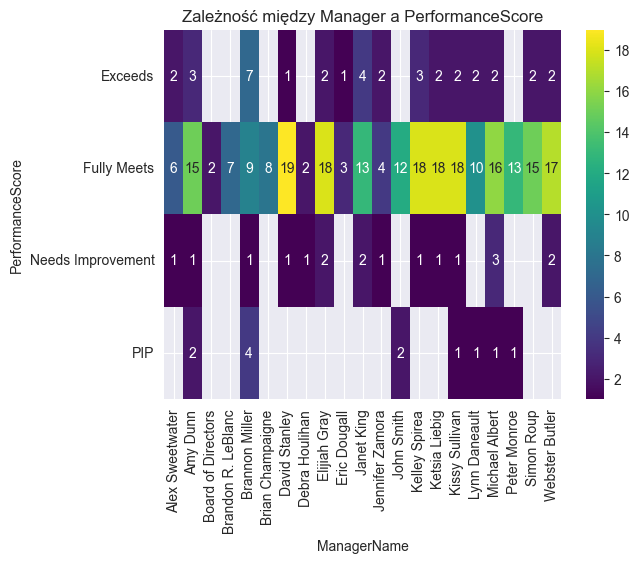

In [60]:
manager_performance = df.pivot_table(index='PerformanceScore', columns='ManagerName', aggfunc='size')
sns.heatmap(manager_performance, annot=True, cmap='viridis')
plt.title('Zależność między Manager a PerformanceScore')
plt.show()

Odpowiedz na pytanie nr 1. "Czy istnieje zaleznos pomiedzy tym, kto jest bezposrednimi przelozonym (ManagerName, ManagerID) danego pracownika, a ocena wydajnosci pracy (Performance Score)?
Mozna wyciagnac takie wnioski, istnieje grupa przelozonych ktorzy daja wysokie noty swoim podwladnym. Do grupy tej zaliczaja sie: Davidl Stanley, Eliijah Gray, Kelley Spirea, Ketsia Liebig, Kissy Sullivan oraz Webster Butler. Najslabsze oceny swoim podwladnym daja odpowiednio przelozeni: Board of Directors, Debra Houlihan, Eric Hougall. 

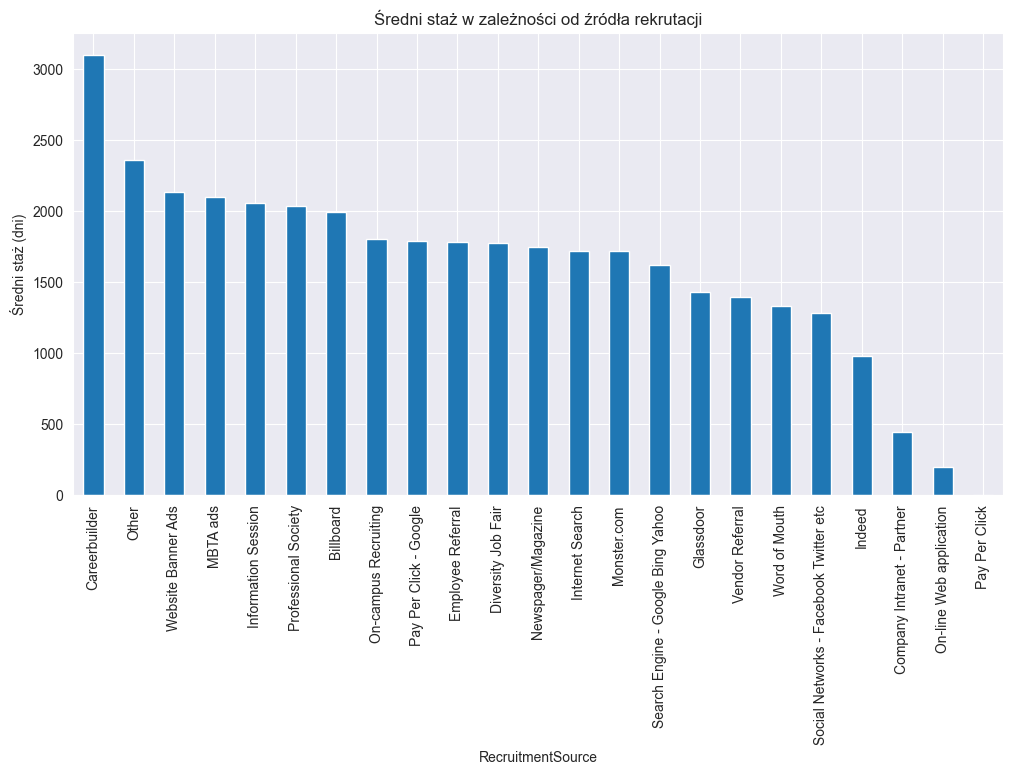

In [54]:
# Pytanie 2: Najlepsze źródła pozyskania pracownika dla długiego stażu
import datetime as dt

def count_seniority(row):
    if pd.isnull(row['DateofTermination']):
        end_date = pd.to_datetime('2019-09-27')
    else:
        end_date = pd.to_datetime(row['DateofTermination'])
    
    hire_date = pd.to_datetime(row['DateofHire'], errors='coerce')  # Dodane errors='coerce' do obsługi nieprawidłowych dat
    
    if pd.isnull(hire_date):
        return None  # Możemy zwrócić None dla przypadków, gdy data zatrudnienia jest nieprawidłowa
        
    return (end_date - hire_date).days

df['DateofHire'] = pd.to_datetime(df['DateofHire'], errors='coerce')  # Dodane errors='coerce' do obsługi nieprawidłowych dat
df['Seniority'] = df.apply(count_seniority, axis=1)

plt.figure(figsize=(12, 6))
source_duration = df.groupby('RecruitmentSource')['Seniority'].mean().sort_values(ascending=False)  # Użyj 'Seniority' zamiast 'DaysLateLast30'
source_duration.plot(kind='bar')
plt.title('Średni staż w zależności od źródła rekrutacji')
plt.ylabel('Średni staż (dni)')
#plt.xticks(rotation=45)  # Obrócenie etykiet osi x, aby były bardziej czytelne
plt.show()


Odpowiedz na pytanie nr 2. Jakie zrodla pozyskania pracownika (Recruitment Source) sa najlepsze, jesli zalezy nam na jak najdluzszym stazu pracownikow?
Jesli zalezy nam na jak najdluzszym stazu prazownikow powinnismy korzystac z zrodel takich jak Careerbuilder. W nastepnej kolejnosci powinnismy korzystac ze zrodel Other i Website Nanner Ads. Jako najgorsze cztery zrodla wymienic nalezy: Pay Per Click, On-line Web applicatoin, Company Intranet - Partner i Indeed.

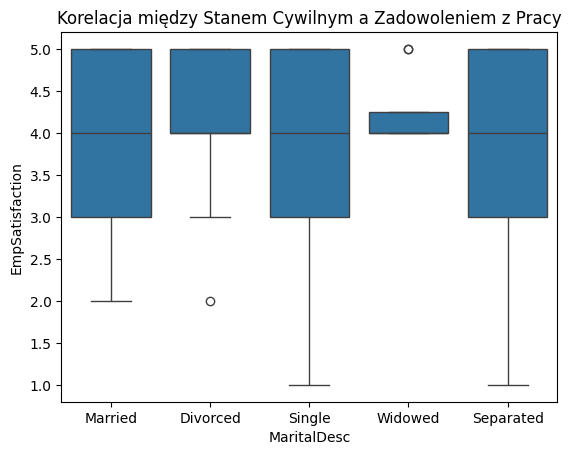

In [26]:
#Pytanie nr 3. Czy stan cywilny (MartiaDesc) pracownika koreluje w jakikolwiek sposob z zadowoleniem z pracy (EmpSatisfaction)?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='MaritalDesc', y='EmpSatisfaction', data=df)
plt.title('Korelacja między Stanem Cywilnym a Zadowoleniem z Pracy')
plt.show()

Analizujac powyzszy wykres przyjac nalezy, ze najbardziej zadowolona grupa w pracy sa osoby rozwiedzione. Na uwage zasluguje rowniez kwestioa osob owdowialych dla ktorych poziom zadowolenia dla wszystkich owdowialych pracownikow jest bardzo zblizony i jest na poziomie 4 punktow. 

0      36.0
1      39.0
2      37.0
3      38.0
4      35.0
       ... 
396     NaN
397     NaN
398     NaN
399     NaN
400     NaN
Name: Age, Length: 401, dtype: float64
Niezwykłe daty urodzenia:
6     2064-06-01
7     2063-05-15
12    2054-10-12
22    2063-08-28
31    2068-01-15
32    2065-05-07
54    2066-03-17
57    2064-01-04
61    2068-07-06
73    2054-09-21
74    2068-10-10
87    2055-11-14
91    2067-04-19
101   2065-05-09
102   2065-09-09
112   2067-06-03
115   2068-07-20
116   2067-06-05
146   2068-08-15
155   2064-04-13
157   2068-05-30
159   2061-06-19
160   2068-06-06
164   2058-12-27
175   2065-02-02
184   2066-03-22
195   2051-01-02
200   2059-08-19
213   2055-04-14
215   2052-08-18
231   2064-10-12
235   2058-11-07
242   2067-01-16
247   2063-10-30
248   2053-05-24
249   2066-04-17
250   2051-02-25
279   2052-02-11
298   2066-11-22
303   2064-07-30
305   2052-01-18
308   2065-09-09
Name: DOB, dtype: datetime64[ns]


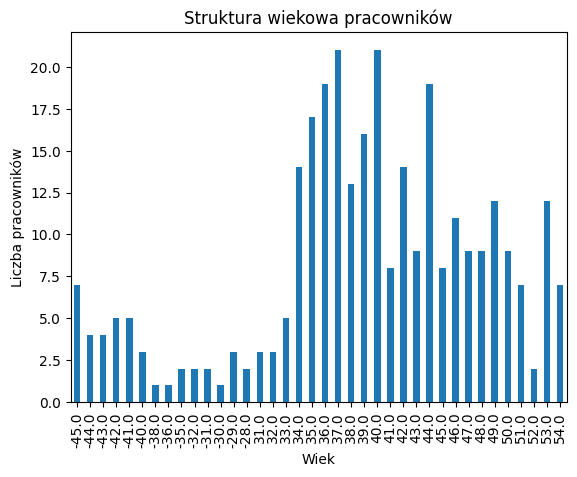

In [30]:
#Jak wyglada struktura wieku aktualnie zatrudnionych pracownikow?

import pandas as pd
import matplotlib.pyplot as plt

# Konwertuj 'DOB' do poprawnego formatu i oblicz wiek
current_year = pd.to_datetime('now').year
df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%y')
df['Age'] = current_year - df['DOB'].dt.year

# Wyświetl informacje o wieku, aby upewnić się, że są poprawne
print(df['Age'])
print("Niezwykłe daty urodzenia:")
print(df[df['Age'] < 0]['DOB'])

# Struktura wiekowa pracowników
age_structure = df['Age'].value_counts().sort_index()
age_structure.plot(kind='bar')
plt.title('Struktura wiekowa pracowników')
plt.xlabel('Wiek')
plt.ylabel('Liczba pracowników')
plt.show()

Jak widac powyzej mam tu blednie wprowadzone dane, dlatego wykres jest wadliwy, przeprowadze dwie opcje, jedna to usuniecie blednych danych, druga to poprawienie blednych dat urodzenia.

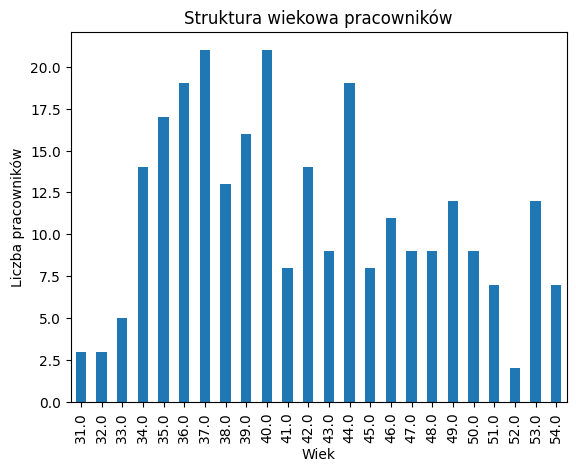

In [31]:
#Usuwanie blednych dat urodzenia.
#Jak wyglada struktura wieku aktualnie zatrudnionych pracownikow?

import pandas as pd
import matplotlib.pyplot as plt

# Konwertuj 'DOB' do poprawnego formatu i oblicz wiek
current_year = pd.to_datetime('now').year
df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%y')
df['Age'] = current_year - df['DOB'].dt.year

# Usunięcie rekordów z nieprawidłowymi datami urodzenia
df = df[df['DOB'].dt.year <= current_year]

# Struktura wiekowa pracowników
age_structure = df['Age'].value_counts().sort_index()
age_structure.plot(kind='bar')
plt.title('Struktura wiekowa pracowników')
plt.xlabel('Wiek')
plt.ylabel('Liczba pracowników')
plt.show()

Po usunieciu blednych danych uzyskujemy informacje, ze w firmie jest dwudziestu pracownikow w wieku 37 lat i w wieku 40 lat. Zaraz za nimi znajduje sie 18 pracownikow w wieku 36 lat i 18 pracownikow w wieku 44 lat. W firmie jest tylko 3 pracowniokw w wieku 31 lat i 3 pracownikow w wieku32 lat. Namniejsza liczba pracowniko ze wzgledu na wiek to dwoch pracownikow w wkieku 52 lat.

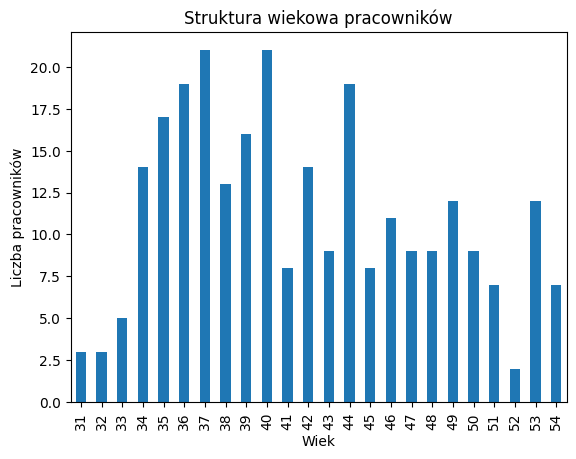

In [32]:
#Poprawienie blednych dat urodzenia
#Jak wyglada struktura wieku aktualnie zatrudnionych pracownikow?

import pandas as pd
import matplotlib.pyplot as plt

# Konwertuj 'DOB' do poprawnego formatu i oblicz wiek
current_year = pd.to_datetime('now').year
df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%y')
df['Age'] = current_year - df['DOB'].dt.year

# Poprawa błędnych dat urodzenia
df.loc[df['DOB'].dt.year > current_year, 'DOB'] = df['DOB'] - pd.DateOffset(years=100)

# Struktura wiekowa pracowników
age_structure = df['Age'].value_counts().sort_index()
age_structure.plot(kind='bar')
plt.title('Struktura wiekowa pracowników')
plt.xlabel('Wiek')
plt.ylabel('Liczba pracowników')
plt.show()

Przy poprawie danych dat urodzenia wykres jest zblizony do wykresu ktory usunal bledne dane. Tym samym wnioski nalezy uznac za takie same. Uzyskujemy informacje, ze w firmie jest dwudziestu pracownikow w wieku 37 lat i w wieku 40 lat. Zaraz za nimi znajduje sie 18 pracownikow w wieku 36 lat i 18 pracownikow w wieku 44 lat. W firmie jest tylko 3 pracowniokw w wieku 31 lat i 3 pracownikow w wieku32 lat. Namniejsza liczba pracowniko ze wzgledu na wiek to dwoch pracownikow w wkieku 52 lat.

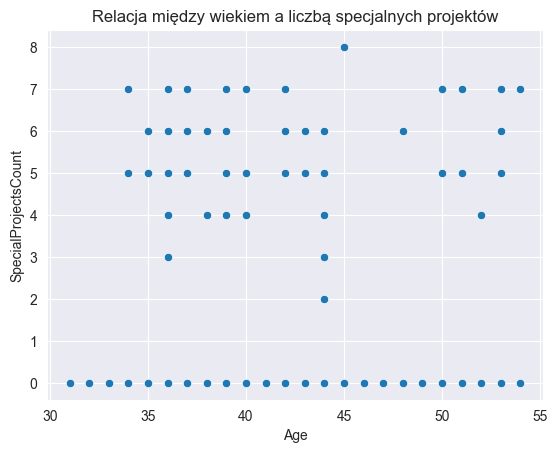

In [42]:
#5 Czy starsi pracownicy pracuj nad wieksz liczb specjalnych projektow niz mlodsi pracownicy?
sns.set_style('darkgrid')

sns.scatterplot(x='Age', y='SpecialProjectsCount', data=df)
plt.title('Relacja między wiekiem a liczbą specjalnych projektów')
plt.show()

Analizujac powyzszy wykres przyjac nalezy, ze najwieksza liczba projektow specjalnych przypada na pracownikow w przedziale wiekowym od 35 do 45 lat. Pracownicy w przedziale wiekowym od 45 do 50 lat oraz pracownicy w przedziale wiekowym od 30 do 35 lat otrzymuja najmniej projektow specialnych. Drugi przedzial wiekowy w ktorym pracownicy otrzymuja wiecej projektow specialnych to przedzial od 50 do 55 lat. 